In [35]:
# 📘 Notebook: 3_SpeedAlertSystemAndAnalysis.ipynb
# Purpose: Detect overspeed vehicles using log, save frames, and visualize alerts

# 📦 Step 1: Import required libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings
from termcolor import colored

# 🔇 Suppress warnings
warnings.filterwarnings('ignore')
print(colored("📦 Step 1: Libraries imported for alert system.", "green", attrs=['reverse']))

📦 Step 1: Libraries imported for alert system.


In [36]:
# 📁 Step 2: Define paths
input_video_path = r"D:\RoadRadar-Real-Time-Speed-Detection-System\output\processed_speed_video.mp4"
alert_output_dir = r"D:\RoadRadar-Real-Time-Speed-Detection-System\output\alerts"
speed_alert_log_csv = r"D:\RoadRadar-Real-Time-Speed-Detection-System\output\speed_alert_log.csv"
os.makedirs(alert_output_dir, exist_ok=True)
print(colored("📁 Step 2: Output directory for alerts ensured.", "green", attrs=['reverse']))

📁 Step 2: Output directory for alerts ensured.


In [37]:
# ⚙️ Step 3: Setup video read
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(colored(f"⚙️ Step 3: Video loaded with {frame_count} frames at {fps:.1f} FPS", "yellow", attrs=['reverse']))


⚙️ Step 3: Video loaded with 1713 frames at 15.0 FPS


In [38]:
# 📍 Step 4: Load speed alert log
alert_df = pd.read_csv(speed_alert_log_csv)
print(colored(f"📍 Step 4: Loaded alert log with {len(alert_df)} entries", "blue", attrs=['reverse']))


📍 Step 4: Loaded alert log with 3171 entries


In [39]:
# 🧠 Step 5: Capture alert frames from video
alert_frames = []
saved_frames = set()
frame_idx = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_idx in alert_df['frame'].values and frame_idx not in saved_frames:
        matching = alert_df[alert_df['frame'] == frame_idx]

        for _, row in matching.iterrows():
            alert_text = f"🚨 {row['vehicle_type']} @ {row['estimated_speed']} km/h"
            color = (0, 0, 255)
            cv2.putText(frame, alert_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)

        alert_path = os.path.join(alert_output_dir, f"alert_frame_{frame_idx}.jpg")
        cv2.imwrite(alert_path, frame)
        alert_frames.append(alert_path)
        saved_frames.add(frame_idx)

    frame_idx += 1

cap.release()
print(colored(f"✅ Step 5: Alert frames saved: {len(alert_frames)}", "blue", attrs=['reverse']))

✅ Step 5: Alert frames saved: 1512


📊 Step 6: Displaying alert samples


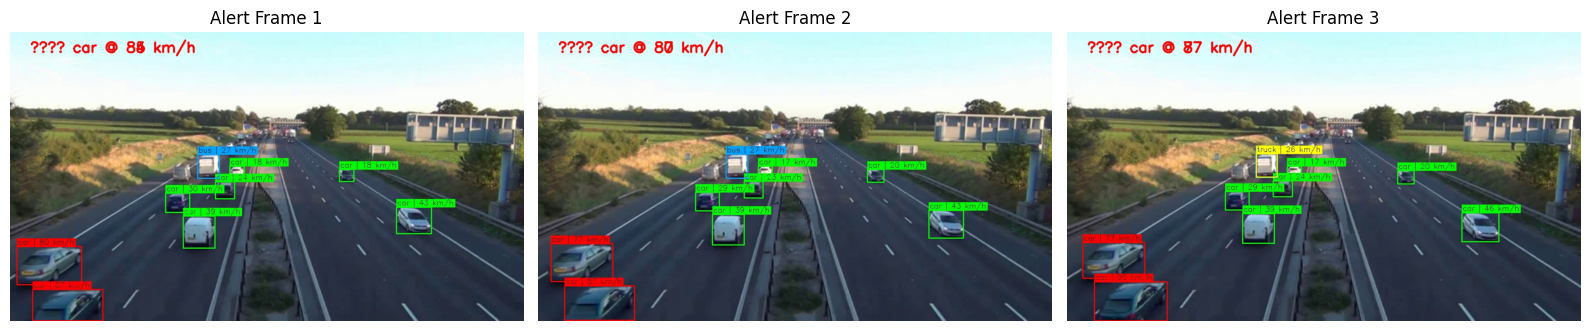

In [40]:
# 📊 Step 6: Display top 5 alert frames 
print(colored("📊 Step 6: Displaying alert samples", "magenta", attrs=['reverse']))

plt.figure(figsize=(16, 5))
for i, path in enumerate(alert_frames[:3]):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Alert Frame {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()
